# Problem Statement:    
You have to perform Sentiment Analysis on the dataset and also built a classifier on the training data.

#### The dataset has been taken from Kaggle. (https://www.kaggle.com/crowdflower/twitter-airline-sentiment/home)

This is a dataset having tweets about 6 US Airlines along with their sentiments: positive, negative and neutral.
    
Datasets :
    
You are provided with two files: 

    * ‘Tweets-train.csv” ==> The train data contains about 11000 tweets
    *‘Tweets-test.csv” ==>   The test data  contains about 4000 tweets. 
    

In [1]:
import pandas as pd
import numpy as np
import nltk


In [2]:
df = pd.read_csv("Tweets-train.csv")
df1 = pd.read_csv("Tweets-test.csv")


In [3]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
df1.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [24]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
1,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
2,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
3,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
4,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [5]:
#Read the training using pandas moduleand select only the sentiment and text columns
df_train = df[['airline_sentiment','text']]
df_test = df1[['airline_sentiment','text']]

In [26]:
df_train.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,neutral,@VirginAmerica I didn't today... Must mean I n...
2,negative,@VirginAmerica it's really aggressive to blast...
3,negative,@VirginAmerica and it's a really big bad thing...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [6]:
df_test.head()

,airline_sentiment,text
0,negative,@AmericanAir why did you drop my call. Why don...
1,negative,@USAirways thanks for the seat that doesn't re...
2,negative,@AmericanAir wasn't just a delay. Your counter...
3,positive,@united social media team is on point on #Osca...
4,neutral,@AmericanAir These birds could fly to South Am...


Observe randomly generated 10 tweets for each sentimentwith respect to the following:
    
    oText contains references with ‘@’
    
    oText contains links (http , https )
    
    oText contains punctuations
    
    oText contains Emoticons 

In [7]:
#function to remove emojis
import emoji

def give_emoji_free_text(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])

    return clean_text

#

df_train =  df_train.copy()
df_train['text_cleaned'] = df_train['text'].apply(lambda x :give_emoji_free_text(x) )
print(df_train.head())

df_test =  df_test.copy()
df_test['text_cleaned'] = df_test['text'].apply(lambda x :give_emoji_free_text(x) )
print(df_test.head())

  airline_sentiment                                               text  \
0          positive  @VirginAmerica plus you've added commercials t...   
1           neutral  @VirginAmerica I didn't today... Must mean I n...   
2          negative  @VirginAmerica it's really aggressive to blast...   
3          negative  @VirginAmerica and it's a really big bad thing...   
4          positive  @VirginAmerica yes, nearly every time I fly VX...   

                                        text_cleaned  
0  @VirginAmerica plus you've added commercials t...  
1  @VirginAmerica I didn't today... Must mean I n...  
2  @VirginAmerica it's really aggressive to blast...  
3  @VirginAmerica and it's a really big bad thing...  
4  @VirginAmerica yes, nearly every time I fly VX...  
  airline_sentiment                                               text  \
0          negative  @AmericanAir why did you drop my call. Why don...   
1          negative  @USAirways thanks for the seat that doesn't re...   
2  

In [9]:
df_test.shape

(4000, 3)

In [11]:
df_train.shape

(10640, 3)

In [12]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
print(type(stopwords))

#Remove Stopwords from all the tweets.Save changes in a new column and list down most common 15 words.


"""
y = []
def remove_stopwords(x):
    for word in word_tokenize(x):
        print(word)
        if word.lower() not in stopwords:
            y.append(word)
    return y
"""
#y1 = []
#y2 = []
def remove_stopwords(x):
    y = []    
    for w in x:
        text = w.split()
        strf = []
        for word in text:
            if word.lower() not in stopwords:
                strf.append(word)
        y.append(" ".join(strf))
    return y
#
y1 = remove_stopwords(df_train['text_cleaned'].values)
y2 = remove_stopwords(df_test['text_cleaned'].values)

#
print(len(y1))
print(len(y2))

#
df_train = df_train.copy()
df_train['text_no_stopword'] = y1
#
df_test = df_test.copy()
df_test['text_no_stopword'] = y2

#
print(df_train.head())
#
print(df_test.head())
# 
word_tokens1 = []
for item in df_train['text_no_stopword'].values:
    token = nltk.word_tokenize(item)
    word_tokens1 = word_tokens1 + token

#
fdist1 = nltk.FreqDist()
for word in word_tokens1:
    fdist1[word.lower()]+=1
print(fdist1.most_common(15))



<class 'list'>
10640
4000
  airline_sentiment                                               text  \
0          positive  @VirginAmerica plus you've added commercials t...   
1           neutral  @VirginAmerica I didn't today... Must mean I n...   
2          negative  @VirginAmerica it's really aggressive to blast...   
3          negative  @VirginAmerica and it's a really big bad thing...   
4          positive  @VirginAmerica yes, nearly every time I fly VX...   

                                        text_cleaned  \
0  @VirginAmerica plus you've added commercials t...   
1  @VirginAmerica I didn't today... Must mean I n...   
2  @VirginAmerica it's really aggressive to blast...   
3  @VirginAmerica and it's a really big bad thing...   
4  @VirginAmerica yes, nearly every time I fly VX...   

                                    text_no_stopword  
0  @VirginAmerica plus added commercials experien...  
1  @VirginAmerica today... Must mean need take an...  
2  @VirginAmerica really ag

In [13]:
#### list of  punctuations and other reference characters
import string
punc = list(string.punctuation)
punc = punc + ['@','http','https']
#
def replacetxt(x):
    for i in punc:
        x = x.replace(i,"")
    return x
#
df_train = df_train.copy()
df_train['text_cleaned'] = df_train['text_no_stopword'].apply(lambda x : replacetxt(x))
#

print(df_train.head())
#
df_test = df_test.copy()
df_test['text_cleaned'] = df_test['text_no_stopword'].apply(lambda x : replacetxt(x))
#

print(df_test.head())

  airline_sentiment                                               text  \
0          positive  @VirginAmerica plus you've added commercials t...   
1           neutral  @VirginAmerica I didn't today... Must mean I n...   
2          negative  @VirginAmerica it's really aggressive to blast...   
3          negative  @VirginAmerica and it's a really big bad thing...   
4          positive  @VirginAmerica yes, nearly every time I fly VX...   

                                        text_cleaned  \
0  VirginAmerica plus added commercials experienc...   
1  VirginAmerica today Must mean need take anothe...   
2  VirginAmerica really aggressive blast obnoxiou...   
3                 VirginAmerica really big bad thing   
4  VirginAmerica yes nearly every time fly VX “ea...   

                                    text_no_stopword  
0  @VirginAmerica plus added commercials experien...  
1  @VirginAmerica today... Must mean need take an...  
2  @VirginAmerica really aggressive blast obnoxio... 

In [14]:
word_tokens = []
for item in df_train['text_cleaned'].values:
    token = nltk.word_tokenize(item)
    word_tokens = word_tokens + token
#

print(len(word_tokens))

#
fdist = nltk.FreqDist()
for word in word_tokens:
    fdist[word.lower()]+=1

#List down the most common 15 words for each sentiment. Observe the results
fdist.most_common(15)

113490


[('united', 2987),
 ('flight', 2752),
 ('usairways', 2223),
 ('americanair', 2161),
 ('southwestair', 1790),
 ('jetblue', 1711),
 ('get', 970),
 ('thanks', 784),
 ('cancelled', 745),
 ('service', 683),
 ('help', 616),
 ('time', 551),
 ('im', 544),
 ('customer', 527),
 ('hours', 508)]

In [15]:
from collections import Counter
Counter(df_train['airline_sentiment'].values)

Counter({'negative': 6670, 'neutral': 2248, 'positive': 1722})

In [16]:
df_train.shape

(10640, 4)

In [17]:
df_test.shape

(4000, 4)

In [18]:
df_train.head()

,airline_sentiment,text,text_cleaned,text_no_stopword
0,positive,@VirginAmerica plus you've added commercials t...,VirginAmerica plus added commercials experienc...,@VirginAmerica plus added commercials experien...
1,neutral,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica today Must mean need take anothe...,@VirginAmerica today... Must mean need take an...
2,negative,@VirginAmerica it's really aggressive to blast...,VirginAmerica really aggressive blast obnoxiou...,@VirginAmerica really aggressive blast obnoxio...
3,negative,@VirginAmerica and it's a really big bad thing...,VirginAmerica really big bad thing,@VirginAmerica really big bad thing
4,positive,"@VirginAmerica yes, nearly every time I fly VX...",VirginAmerica yes nearly every time fly VX “ea...,"@VirginAmerica yes, nearly every time fly VX “..."


In [19]:
df_test.head()

,airline_sentiment,text,text_cleaned,text_no_stopword
0,negative,@AmericanAir why did you drop my call. Why don...,AmericanAir drop call people answering phones ...,@AmericanAir drop call. people answering phone...
1,negative,@USAirways thanks for the seat that doesn't re...,USAirways thanks seat recline Im shocked Im as...,@USAirways thanks seat recline. I'm shocked I'...
2,negative,@AmericanAir wasn't just a delay. Your counter...,AmericanAir delay counter take valid CAC card ...,@AmericanAir delay. counter take valid CAC car...
3,positive,@united social media team is on point on #Osca...,united social media team point OscarNight,@united social media team point #OscarNight :)
4,neutral,@AmericanAir These birds could fly to South Am...,AmericanAir birds could fly South America exam...,@AmericanAir birds could fly South America exa...


In [20]:
#Remove these words from all the tweets
#americanair,united,delta,southwestair,jetblue,virginamerica,usairways,flight,plane
#Save changes in a new column and list down most common 15 words.Comment your observations
z = []
list1 = ['americanair','united','delta','southwestair','jetblue','virginamerica','usairways','flight','plane']
for words in df_train['text_cleaned'].values:
     if words not in list1:
        z.append(words)

In [21]:
word_tokens2 = []
for item in z:
    token = nltk.word_tokenize(item)
    word_tokens2 = word_tokens2 + token

In [22]:
fdist2 = nltk.FreqDist()
for word in word_tokens2:
    fdist2[word.lower()]+=1
fdist2.most_common(15)

[('united', 2987),
 ('flight', 2752),
 ('usairways', 2223),
 ('americanair', 2161),
 ('southwestair', 1790),
 ('jetblue', 1711),
 ('get', 970),
 ('thanks', 784),
 ('cancelled', 745),
 ('service', 683),
 ('help', 616),
 ('time', 551),
 ('im', 544),
 ('customer', 527),
 ('hours', 508)]

In [23]:
df_train = df_train.copy()
df_train['final_text'] =z

In [24]:
#Remove these words from all the tweets
#americanair,united,delta,southwestair,jetblue,virginamerica,usairways,flight,plane
#Save changes in a new column and list down most common 15 words.Comment your observations
z1 = []
list1 = ['americanair','united','delta','southwestair','jetblue','virginamerica','usairways','flight','plane']
for words in df_test['text_cleaned'].values:
     if words not in list1:
        z1.append(words)

In [25]:
df_test = df_test.copy()
df_test['final_text'] =z1

In [26]:
df_train.head()

,airline_sentiment,text,text_cleaned,text_no_stopword,final_text
0,positive,@VirginAmerica plus you've added commercials t...,VirginAmerica plus added commercials experienc...,@VirginAmerica plus added commercials experien...,VirginAmerica plus added commercials experienc...
1,neutral,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica today Must mean need take anothe...,@VirginAmerica today... Must mean need take an...,VirginAmerica today Must mean need take anothe...
2,negative,@VirginAmerica it's really aggressive to blast...,VirginAmerica really aggressive blast obnoxiou...,@VirginAmerica really aggressive blast obnoxio...,VirginAmerica really aggressive blast obnoxiou...
3,negative,@VirginAmerica and it's a really big bad thing...,VirginAmerica really big bad thing,@VirginAmerica really big bad thing,VirginAmerica really big bad thing
4,positive,"@VirginAmerica yes, nearly every time I fly VX...",VirginAmerica yes nearly every time fly VX “ea...,"@VirginAmerica yes, nearly every time fly VX “...",VirginAmerica yes nearly every time fly VX “ea...


In [27]:
df_train.shape

(10640, 5)

In [28]:
df_test.head()

,airline_sentiment,text,text_cleaned,text_no_stopword,final_text
0,negative,@AmericanAir why did you drop my call. Why don...,AmericanAir drop call people answering phones ...,@AmericanAir drop call. people answering phone...,AmericanAir drop call people answering phones ...
1,negative,@USAirways thanks for the seat that doesn't re...,USAirways thanks seat recline Im shocked Im as...,@USAirways thanks seat recline. I'm shocked I'...,USAirways thanks seat recline Im shocked Im as...
2,negative,@AmericanAir wasn't just a delay. Your counter...,AmericanAir delay counter take valid CAC card ...,@AmericanAir delay. counter take valid CAC car...,AmericanAir delay counter take valid CAC card ...
3,positive,@united social media team is on point on #Osca...,united social media team point OscarNight,@united social media team point #OscarNight :),united social media team point OscarNight
4,neutral,@AmericanAir These birds could fly to South Am...,AmericanAir birds could fly South America exam...,@AmericanAir birds could fly South America exa...,AmericanAir birds could fly South America exam...


In [29]:
df_test.shape

(4000, 5)

In [30]:
df_final_train = df_train[['airline_sentiment','final_text']]
df_final_test = df_test[['airline_sentiment','final_text']]

In [31]:
df_final_train.shape

(10640, 2)

In [32]:
df_final_test.shape

(4000, 2)

In [33]:
#Encode Sentiments using Label Encoder
from sklearn.preprocessing import LabelEncoder
transform = LabelEncoder()
labels = transform.fit_transform(df_final_train['airline_sentiment'])
labels1 = transform.fit_transform(df_final_test['airline_sentiment'])

In [34]:
df_final_train = df_final_train.copy()
df_final_train['Labels'] = labels
#
df_final_test = df_final_test.copy()
df_final_test['Labels'] = labels1

In [35]:
df_final_train.head()

,airline_sentiment,final_text,Labels
0,positive,VirginAmerica plus added commercials experienc...,2
1,neutral,VirginAmerica today Must mean need take anothe...,1
2,negative,VirginAmerica really aggressive blast obnoxiou...,0
3,negative,VirginAmerica really big bad thing,0
4,positive,VirginAmerica yes nearly every time fly VX “ea...,2


In [36]:
df_final_train.shape

(10640, 3)

In [37]:
df_final_test.head()

,airline_sentiment,final_text,Labels
0,negative,AmericanAir drop call people answering phones ...,0
1,negative,USAirways thanks seat recline Im shocked Im as...,0
2,negative,AmericanAir delay counter take valid CAC card ...,0
3,positive,united social media team point OscarNight,2
4,neutral,AmericanAir birds could fly South America exam...,1


In [38]:
df_final_test.shape

(4000, 3)

In [69]:
#Vectorize the Text Column (Youcan choose any vectorizer of your choice)
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = TfidfVectorizer(min_df=1,lowercase=True)
x_counts = count_vect.fit_transform(df_final_train['final_text'])

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [70]:
x_counts.shape

(10640, 13672)

In [71]:
type(x_counts)

scipy.sparse.csr.csr_matrix

In [72]:
x_names = count_vect.get_feature_names()
x_names

['00',
 '0016',
 '006',
 '0162389030167',
 '0162424965446',
 '0162431184663',
 '0167560070877',
 '022015',
 '03',
 '0303',
 '0316',
 '0400',
 '0510',
 '0600',
 '0638',
 '0671',
 '0736',
 '0xjareds',
 '10',
 '100',
 '1000',
 '10000',
 '10000lbs',
 '1000cost',
 '1000p',
 '1000pm',
 '1001',
 '1002',
 '1007',
 '1007p',
 '1008',
 '100pm',
 '100s',
 '101',
 '1010',
 '1015',
 '1015am',
 '1019',
 '102',
 '1020',
 '1020pm',
 '10215',
 '1024',
 '1025',
 '1027',
 '1028',
 '103',
 '1030',
 '1030a',
 '1030pm',
 '1031',
 '1039',
 '104',
 '1045',
 '1045pm',
 '1046',
 '105',
 '1050',
 '1050am',
 '1051',
 '1051pm',
 '1055',
 '1055pm',
 '1058',
 '106',
 '1065',
 '1071',
 '1074',
 '1079871763',
 '1080',
 '1081',
 '108639',
 '1098',
 '1099',
 '10a',
 '10am',
 '10d',
 '10hour',
 '10hrs',
 '10m',
 '10min',
 '10mins',
 '10minute',
 '10p',
 '10pm',
 '10th',
 '10voucherwhatajoke',
 '10x',
 '10x9x17',
 '11',
 '110',
 '1100',
 '1100pm',
 '1101',
 '1102',
 '1109',
 '1114',
 '1115',
 '1120am',
 '1121p',
 '1123',
 

In [73]:
X_count_vect = pd.DataFrame(x_counts.toarray(), columns=x_names)

In [74]:
X_count_vect.head()

,00,0016,006,0162389030167,0162424965446,0162431184663,0167560070877,022015,03,0303,...,zip,zkatcher,zone,zones,zoom,zrh,zrhairport,zukes,zurich,zurichnew
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
#Vectorize the Text Column in test data set
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
count_vect_test = TfidfVectorizer(min_df=1,lowercase=True)
x_counts_test = count_vect_test.fit_transform(df_final_test['final_text'])

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [95]:
x_counts_test.shape

(4000, 7526)

In [81]:
type(x_counts_test)

scipy.sparse.csr.csr_matrix

In [82]:
x_names_test = count_vect_test.get_feature_names()
x_names_test

['0011',
 '0214',
 '021mbps',
 '0223',
 '02272015',
 '02282015',
 '03032015',
 '0372389047497',
 '0510',
 '0530',
 '0769',
 '10',
 '100',
 '1000',
 '10000',
 '1001pm',
 '1005am',
 '1005pm',
 '100s',
 '101',
 '1010',
 '101030',
 '1014am',
 '1016',
 '1024',
 '103',
 '1030',
 '1032',
 '1035',
 '1038',
 '1041',
 '105',
 '1051',
 '108',
 '1086',
 '1089',
 '1098',
 '10a',
 '10am',
 '10f',
 '10min',
 '10pm',
 '10th',
 '10yr',
 '11',
 '110',
 '1100',
 '1106',
 '1108',
 '1110p',
 '11132012',
 '1115p',
 '1117',
 '1119',
 '112',
 '1120',
 '1125',
 '1130',
 '1130pm',
 '1137',
 '1140am',
 '1142',
 '1145am',
 '1159',
 '117',
 '1170',
 '1171',
 '1172',
 '118',
 '1183',
 '11a',
 '11am',
 '11th',
 '12',
 '1200',
 '1200dont',
 '1212',
 '1217',
 '1219',
 '122',
 '1220',
 '1225',
 '1226pm',
 '1228',
 '123',
 '1230',
 '1245am',
 '125',
 '1250pm',
 '1254',
 '12888155964',
 '129',
 '12a',
 '12b',
 '12h30am',
 '12month',
 '13',
 '130',
 '1300',
 '13001885409',
 '13015',
 '130am',
 '130pm',
 '1310',
 '132',
 '

In [83]:
X_count_vect_test = pd.DataFrame(x_counts_test.toarray(), columns=x_names_test)

In [84]:
X_count_vect_test.head()

,0011,0214,021mbps,0223,02272015,02282015,03032015,0372389047497,0510,0530,...,yyz,yyzua70435,z1,zero,zippers,zj76,zkatcher,zombie,zone,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#Prepare a multiclass Classification model using any classification algorithmand create a model 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [78]:
#X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X_count_vect,y,test_size=0.25,random_state = 5)

In [61]:
df_final_train.head()

,airline_sentiment,final_text,Labels
0,positive,VirginAmerica plus added commercials experienc...,2
1,neutral,VirginAmerica today Must mean need take anothe...,1
2,negative,VirginAmerica really aggressive blast obnoxiou...,0
3,negative,VirginAmerica really big bad thing,0
4,positive,VirginAmerica yes nearly every time fly VX “ea...,2


In [90]:
X_count_vect.shape,X_count_vect_test.shape

((10640, 13672), (4000, 7526))

In [85]:
X_train_cv = X_count_vect
y_train_cv = df_final_train['Labels'].values

X_test_cv = X_count_vect_test
y_test_cv = df_final_test['Labels'].values

In [86]:
X_train_cv.shape,X_test_cv.shape

((10640, 13672), (4000, 7526))

In [89]:
type(X_train_cv)

pandas.core.frame.DataFrame

In [96]:
X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X_count_vect,df_final_train['Labels'].values,test_size=0.25,random_state = 5)

In [97]:
clf_cv = MultinomialNB()
clf_cv.fit(X_train_cv,y_train_cv)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
y_pred_cv = clf_cv.predict(X_test_cv)

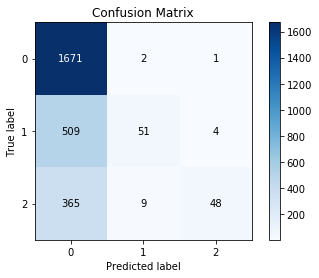

In [101]:
import scikitplot
%matplotlib inline
scikitplot.metrics.plot_confusion_matrix(y_test_cv,y_pred_cv)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score : ",accuracy_score(y_test_cv,y_pred_cv)*100)

Accuracy Score :  66.54135338345864


In [103]:
X_train_cv.shape,X_test_cv.shape

((7980, 13672), (2660, 13672))

#### Using the test dataset

In [111]:
X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X_count_vect_test,df_final_test['Labels'].values,test_size=0.25,random_state = 5)

In [112]:
X_train_cv.shape,X_test_cv.shape

((3000, 7526), (1000, 7526))

In [113]:
clf_cv = MultinomialNB()
clf_cv.fit(X_train_cv,y_train_cv)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [114]:
y_pred_cv = clf_cv.predict(X_test_cv)

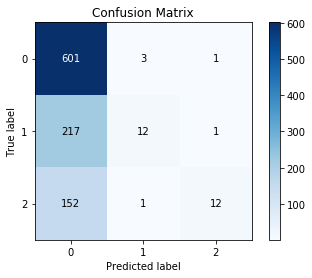

In [115]:
import scikitplot
%matplotlib inline
scikitplot.metrics.plot_confusion_matrix(y_test_cv,y_pred_cv)

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score : {}%".format(accuracy_score(y_test_cv,y_pred_cv)*100))

Accuracy Score : 62.5%
